# Final Frontier

Project workbook for space project

In [1]:
#Imports

import warnings
warnings.filterwarnings("ignore")

#for data manipulation
import pandas as pd

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Set figure size for all plots
plt.rc("figure", figsize = (16,16))

#Set fontsize for titles
plt.rc("font", size=14)

In [2]:
#bring in dataframe

df = pd.read_csv("../Data/Space_Corrected.csv")


In [3]:
df.shape

(4324, 9)

In [4]:
df.sample(4)

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
2129,2129,2129,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Mon Jun 17, 1985 11:33 UTC",Space Shuttle Discovery | STS-51-G,StatusRetired,450.0,Success
767,767,767,Land Launch,"Site 45/1, Baikonur Cosmodrome, Kazakhstan","Sun Jun 21, 2009 21:50 UTC",Zenit-3 SLB | MEASAT 3a,StatusActive,NaN,Success
2100,2100,2100,RVSN USSR,"Site 45/1, Baikonur Cosmodrome, Kazakhstan","Tue Oct 22, 1985 07:00 UTC",Zenit-2 | Cosmos 1697,StatusRetired,NaN,Success
2253,2253,2253,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Sun Jul 24, 1983 05:50 UTC",Vostok-2M | Cosmos 1484,StatusRetired,NaN,Success


In [5]:
#drop columns
df.drop(columns=["Unnamed: 0", "Unnamed: 0.1"], inplace = True)

In [6]:
df

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [7]:
#check 
df.isnull().sum()

Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
 Rocket           3360
Status Mission       0
dtype: int64

In [8]:
#check how many unique companies companies are listed
df["Company Name"].nunique()

56

In [9]:
df["Company Name"].unique()

array(['SpaceX', 'CASC', 'Roscosmos', 'ULA', 'JAXA', 'Northrop', 'ExPace',
       'IAI', 'Rocket Lab', 'Virgin Orbit', 'VKS RF', 'MHI', 'IRGC',
       'Arianespace', 'ISA', 'Blue Origin', 'ISRO', 'Exos', 'ILS',
       'i-Space', 'OneSpace', 'Landspace', 'Eurockot', 'Land Launch',
       'CASIC', 'KCST', 'Sandia', 'Kosmotras', 'Khrunichev', 'Sea Launch',
       'KARI', 'ESA', 'NASA', 'Boeing', 'ISAS', 'SRC', 'MITT', 'Lockheed',
       'AEB', 'Starsem', 'RVSN USSR', 'EER', 'General Dynamics',
       'Martin Marietta', 'Yuzhmash', 'Douglas', 'ASI', 'US Air Force',
       'CNES', 'CECLES', 'RAE', 'UT', 'OKB-586', 'AMBA',
       "Arm??e de l'Air", 'US Navy'], dtype=object)

In [10]:
df["Status Mission"].nunique()

4

In [11]:
df["Status Mission"].unique()

array(['Success', 'Failure', 'Prelaunch Failure', 'Partial Failure'],
      dtype=object)

In [12]:
#create a crosstab for comanies and status mission
ctab_df = pd.crosstab(df["Status Mission"], df["Company Name"])

In [13]:
#function to create a distro plot

def distro_plot_for_single_column(dataframe, column_name):
    """Taked in a dataframe name and column name
    and return a distrobution plot for that column"""
    
    #Set figure size for all plots
    plt.rc("figure", figsize = (16,16))

    #Set fontsize for titles
    plt.rc("font", size=14)
    
    #Set color for distro plot
    c = "#5B0A91"
    plt.title(f"Distribution plot for {column_name}")
    sns.distplot(dataframe[column_name], color = c)

In [14]:
def ditro_plot_for_entire_df(df):
    """
    Takes in a numerical only dataframe such as a crosstab
    and returns Distribution plots for each column in the
    dataframe.
    """
    for i, col in enumerate(df.columns):
        plt.figure(i)
        distro_plot_for_single_column(df, col)

In [15]:
#test function to make sure it works and comment out after testing
#ditro_plot_for_entire_df(ctab_df)

In [16]:
df

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


To do:

Use a label encoder on status mission


In [17]:
df_1 = df["Status Mission"].value_counts().reset_index()

In [18]:
df_1

,index,Status Mission
0,Success,3879
1,Failure,339
2,Partial Failure,102
3,Prelaunch Failure,4


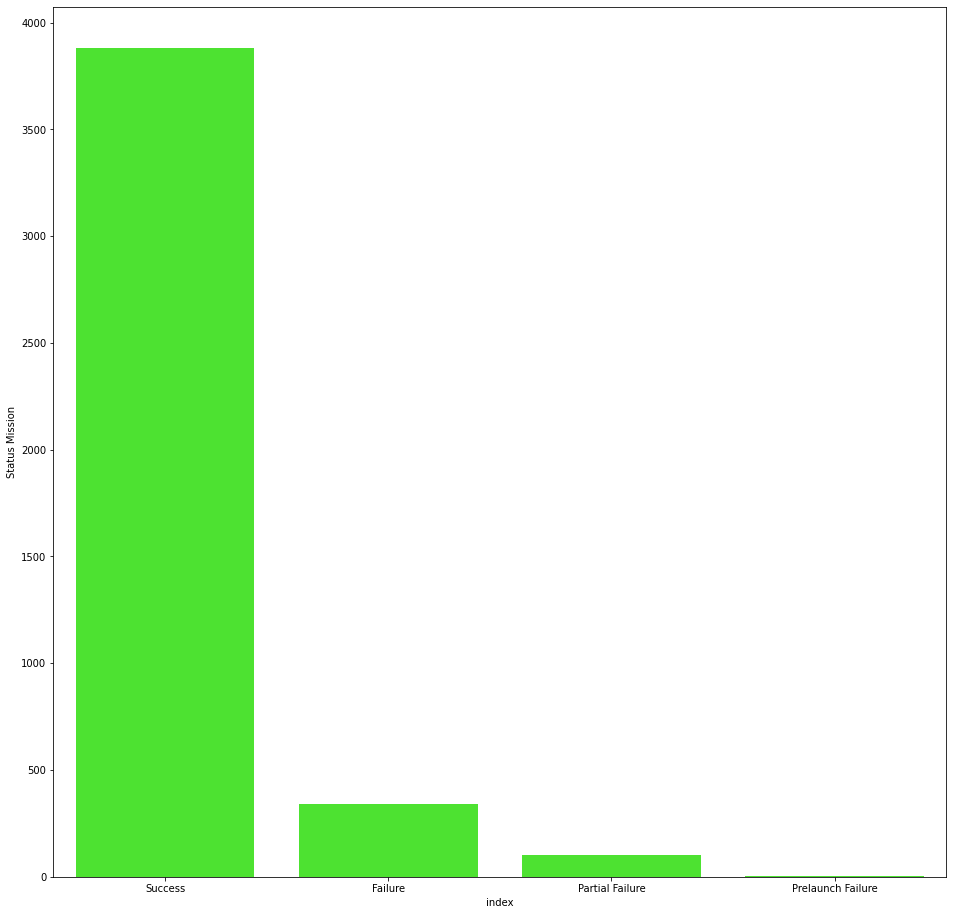

In [19]:
plt.figure("figure", figsize = (16,16))
sns.barplot(df_1["index"], df_1["Status Mission"], color="#39FF14")

In [32]:
def get_space_data():
    # Pull in the data into a pandas data frame
    df = pd.read_csv('../data/Space_Corrected.csv')
    
    # drop excess columns generated by pandas
    df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace = True)
    
    # Rename the columns
    df.pipe(rename_columns)
    
    # Change the date column to a pandas datetime type
    df.date_time = pd.to_datetime(df.date_time)
    
    # Create the year column
    df['year'] = df.date_time.apply(lambda datetime: datetime.year)
    
    # Set the index to be the datetime column, then drop it from the dataframe
    df.set_index(df.date_time, inplace=True)
    df.drop(columns='date_time', inplace=True)
    
    # Fill missing values with 0
    df.mission_cost.fillna(0, inplace=True) 
    
    return df

def rename_columns(df):
    new_col_names = ['company_name', 'location', 'date_time',
       'rocket_type', 'rocket_status', 'mission_cost', 'mission_status']
    
    df.columns = new_col_names
    
    return df

In [33]:
def mission_result(df):
    # Creating a new column and setting it's default as 1
    df['mission_result'] = 1
    
    # Slicing by the rows that contain a failure, then setting the result to 0
    df.loc[df.mission_status.str.contains('Failure'), 'mission_result'] = 0
    
    return df

In [34]:
df = get_space_data()

In [35]:
df = mission_result(df)

In [36]:
df.sample()

,company_name,location,date_time,rocket_type,rocket_status,mission_cost,mission_status,mission_result
1981,RVSN USSR,"Site 32/1, Plesetsk Cosmodrome, Russia",1987-09-07 23:50:00+00:00,Tsyklon-3 | Cosmos 1875 to 1880,StatusRetired,0,Success,1


In [37]:
df['country'] = df['location'].str.split(', ').str[-1]
df['country'].loc[df['country'] == 'Shahrud Missile Test Site'] = "Iran"
df['country'].loc[df['country'] == 'New Mexico'] = 'United States of America'
df['country'].loc[df['country'] == 'Yellow Sea'] = "China"
df['country'].loc[df['country'] == 'Pacific Missile Range Facility'] = "United States of America"
df['country'].loc[df['country'] == 'Pacific Ocean'] = "United States of America"
df['country'].loc[df['country'] == 'Barents Sea'] = 'Russia'
df['country'].loc[df['country'] == 'Gran Canaria'] = 'United States of America'
df['country'].loc[df['country'] == 'USA'] = 'United States of America'

In [38]:
df.head()

,company_name,location,date_time,rocket_type,rocket_status,mission_cost,mission_status,mission_result,country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,1,United States of America
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,1,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,0,Success,1,United States of America
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,1,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,1,United States of America


In [39]:
df.country.value_counts()

Russia                      1398
United States of America    1387
Kazakhstan                   701
France                       303
China                        269
Japan                        126
India                         76
Iran                          14
New Zealand                   13
Israel                        11
Kenya                          9
Australia                      6
North Korea                    5
Brazil                         3
South Korea                    3
Name: country, dtype: int64

In [40]:
df['year'] = df.date_time.apply(lambda datetime: datetime.year)

In [41]:
df.head()

,company_name,location,date_time,rocket_type,rocket_status,mission_cost,mission_status,mission_result,country,year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,1,United States of America,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,1,China,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,0,Success,1,United States of America,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,1,Kazakhstan,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,1,United States of America,2020


In [ ]:
table = pd.pivot_table(df, values='year', index='country',
                    columns='Status Mission', aggfunc='count', fill_value=0)
table['Success (in prc)'] = table['Success'] / table.sum(axis=1)
table.style.format({'Success (in prc)' : '{:.2%}'})\
           .background_gradient(cmap='Reds')\
           .background_gradient(cmap='Blues',subset=["Success"])\
           .background_gradient(cmap='YlOrBr',subset=["Success (in prc)"])